## Exploratory Data Analysis

In [1]:
from pyforest import *

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

<IPython.core.display.Javascript object>

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
ImportantData = pd.concat([data.iloc[:,0],data.iloc[:,-2:]], axis = 1)
ImportantData.head()

<IPython.core.display.Javascript object>

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0


#### Time --> how much time has passed since the first transaction
#### Amount --> how much money has been used in that transaction
#### Class --> if 1 <=> fraud; if 0 <=> no fraud

In [4]:
ImportantData.dtypes

Time      float64
Amount    float64
Class       int64
dtype: object

In [5]:
ImportantData.shape

(284807, 3)

In [6]:
ImportantData.isnull().sum()

Time      0
Amount    0
Class     0
dtype: int64

## Visualization

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Time', ylabel='Amount'>

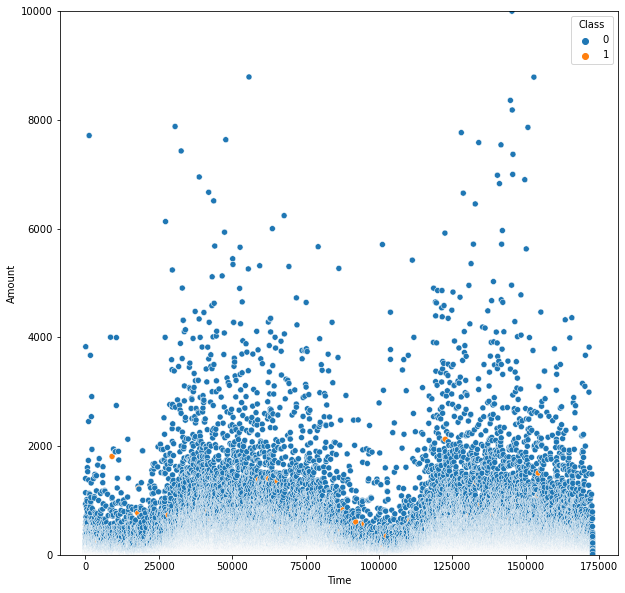

In [7]:
plt.figure(figsize = (10,10))
axes = plt.gca()
axes.set_ylim([0,10000])
sns.scatterplot(x = ImportantData['Time'], y = ImportantData['Amount'], hue = ImportantData['Class'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

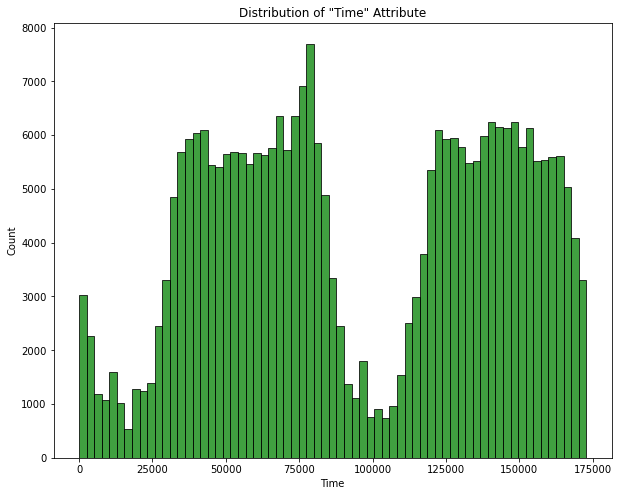

In [8]:
plt.figure(figsize=(10,8))
plt.title('Distribution of "Time" Attribute')
sns.histplot(ImportantData['Time'],color='green');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

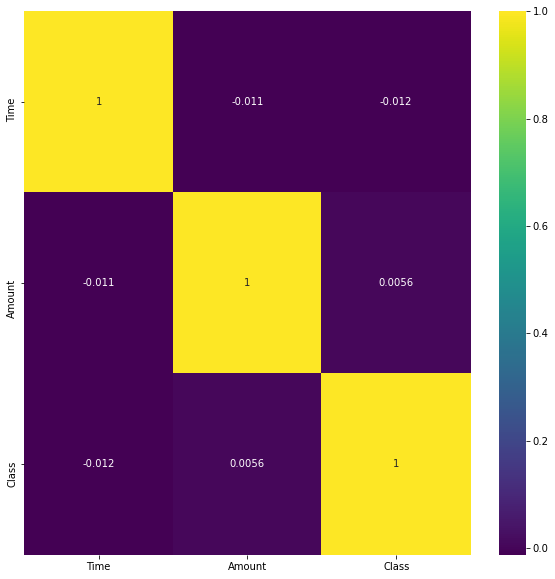

In [9]:
plt.figure(figsize = (10,10))
sns.heatmap(ImportantData.corr(), cmap = 'viridis', annot = True)           
           

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

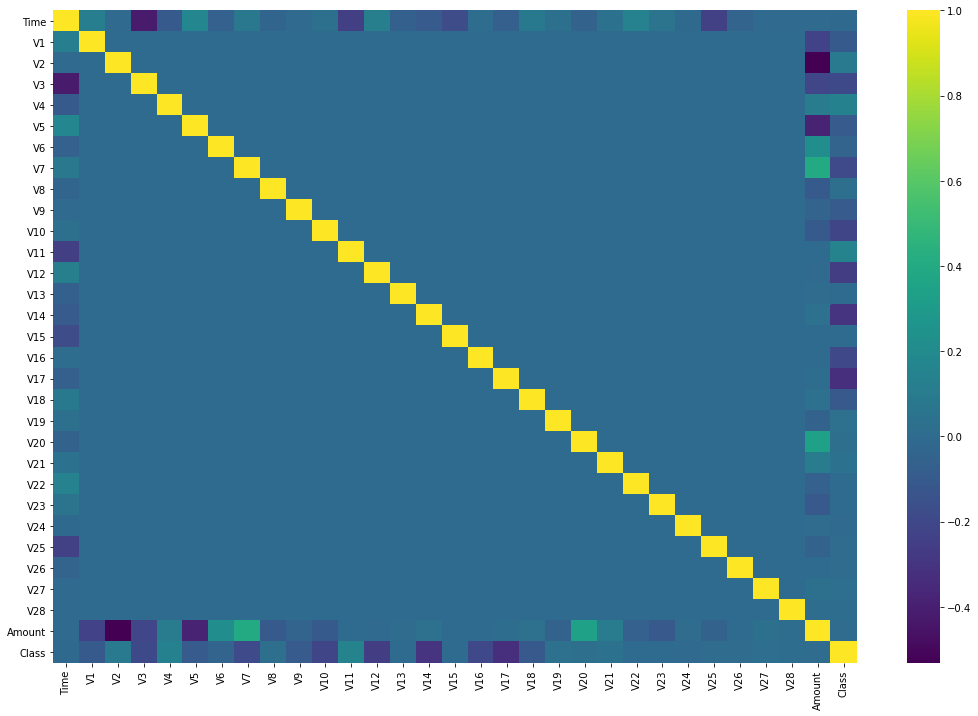

In [10]:
plt.figure(figsize = (18,12))
sns.heatmap(data.corr(), cmap = 'viridis')   

## Splitting the data

In [11]:
X = data.drop('Class',axis = 1)
y = data['Class']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 1)

<IPython.core.display.Javascript object>

In [13]:
X = pd.concat([X_train,y_train], axis = 1) #concatenating training data back together

<IPython.core.display.Javascript object>

In [14]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
260755,159708.0,-0.459482,1.198230,2.315423,4.274698,0.603004,2.280395,0.026612,0.564397,-1.726571,...,-0.351269,-0.906878,-0.131385,0.050282,0.029694,0.144998,0.114877,0.093615,27.23,0
191155,129139.0,1.878563,0.020785,-1.621113,2.908813,2.507847,4.709442,-0.830626,1.136154,-0.395755,...,0.079998,0.404327,0.121098,0.707538,0.140100,0.155684,0.016375,-0.053892,0.00,0
4791,4263.0,-1.467414,1.210542,1.891733,-0.282189,-0.214526,-0.201625,1.547764,-0.284276,0.907166,...,-0.039093,0.097313,-0.302656,0.320926,0.586090,-0.631388,-0.298853,0.016153,153.00,0
159931,113041.0,2.073474,-0.147624,-1.495803,0.184499,0.107505,-0.858107,0.046284,-0.179913,0.984100,...,0.250739,0.802850,0.034933,0.655414,0.289638,-0.442057,-0.003265,-0.051052,1.00,0
124588,77352.0,1.097497,0.357207,1.051187,2.631217,-0.464023,-0.006905,-0.183556,0.166381,-0.456974,...,-0.232654,-0.626643,0.106893,0.486223,0.296727,-0.207474,0.001507,0.016926,3.93,0


## Dummy Classifier to check Data Imbalance

In [15]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train,y_train)

DummyClassifier(strategy='most_frequent')

In [16]:
print('Accuracy score: {}%'.format(dummy.score(X_test,y_test)))

Accuracy score: 0.9984410550265442%


In [17]:
print('Unique values: {}'.format(np.unique(dummy.predict(X_test))))

<IPython.core.display.Javascript object>

Unique values: [0]


### Just as we expected.Because of the big data imbalance, the algorithm is predicting only non-frauds and it completely neglects frauds!

#### In order to deal with the data imbalance we will we using 3 different technicques: Upsampling,Downsampling,SMOTE

## Upsampling

In [18]:
from sklearn.utils import resample

In [19]:
fraud = X[X['Class'] == 1]
no_fraud = X[X['Class'] == 0]

fraud_resampled = resample(fraud, replace = True, n_samples = len(no_fraud), random_state = 88)
Resampled = pd.concat([no_fraud, fraud_resampled])
Resampled['Class'].value_counts()

<IPython.core.display.Javascript object>

0    213224
1    213224
Name: Class, dtype: int64

## Building Logistric Regression model

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
X = Resampled.drop('Class', axis = 1)
y = Resampled['Class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state =1)
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train,y_train)
score = logreg.score(X_test,y_test)
print('Logistic Regression Model score after upsampling is: {}%'.format(score * 100))

<IPython.core.display.Javascript object>

Logistic Regression Model score after upsampling is: 94.25567671082972%


In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print('...' * 30)
print('Logistic Regression Classification Report')
print('...' * 30)
print('...' * 30)
print('...' * 30)
print(classification_report(y_test,logreg.predict(X_test)))

..........................................................................................
Logistic Regression Classification Report
..........................................................................................
..........................................................................................
..........................................................................................
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     63954
           1       0.98      0.91      0.94     63981

    accuracy                           0.94    127935
   macro avg       0.94      0.94      0.94    127935
weighted avg       0.94      0.94      0.94    127935



In [24]:
ConfusionMatrix = pd.DataFrame(confusion_matrix(y_test,logreg.predict(X_test)))
ConfusionMatrix

<IPython.core.display.Javascript object>

,0,1
0,62616,1338
1,6011,57970


In [25]:
print('Logistic Regression Model score is: {}%'.format(score * 100))

Logistic Regression Model score is: 94.25567671082972%


## Downsampling

In [26]:
no_fraud_resampled = resample(no_fraud, replace = False, n_samples = len(fraud), random_state = 68)
Resampled = pd.concat([fraud,no_fraud_resampled])
Resampled['Class'].value_counts()

<IPython.core.display.Javascript object>

0    381
1    381
Name: Class, dtype: int64

## Building Logistric Regression model

In [27]:
X = Resampled.drop('Class', axis = 1)
y = Resampled['Class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state =1)
logreg2 = LogisticRegression(solver = 'liblinear')
logreg2.fit(X_train,y_train)
print('Logistic Regression Model score after downsampling is: {}%'.format(logreg2.score(X_test,y_test) * 100))

<IPython.core.display.Javascript object>

Logistic Regression Model score after downsampling is: 96.06986899563319%


In [28]:
print('...' * 30)
print('Logistic Regression Classification Report')
print('...' * 30)
print('...' * 30)
print('...' * 30)
print(classification_report(y_test,logreg2.predict(X_test)))

..........................................................................................
Logistic Regression Classification Report
..........................................................................................
..........................................................................................
..........................................................................................
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       118
           1       0.99      0.93      0.96       111

    accuracy                           0.96       229
   macro avg       0.96      0.96      0.96       229
weighted avg       0.96      0.96      0.96       229



In [29]:
ConfusionMatrix = pd.DataFrame(confusion_matrix(y_test,logreg2.predict(X_test)))
ConfusionMatrix

<IPython.core.display.Javascript object>

,0,1
0,117,1
1,8,103


## SMOTE Method(SMOTE comes from Synthetic Minority Oversampling Technique)

In [30]:
from imblearn.over_sampling import SMOTE


In [31]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)

<IPython.core.display.Javascript object>

In [33]:
model = SMOTE(random_state = 1)
X_train,y_train = model.fit_resample(X_train,y_train)

## Building Logistric Regression model

In [34]:
logreg3 = LogisticRegression(solver = 'liblinear')
logreg3.fit(X_train,y_train)
print('Logistic Regression Model score after SMOTE is: {}%'.format(logreg3.score(X_test,y_test) * 100))

Logistic Regression Model score after SMOTE is: 98.57799936799972%


## Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
model = RandomForestClassifier(n_estimators = 10).fit(X_train,y_train)

In [37]:
print('Random Forest Model score: {}%'.format(model.score(X_test,y_test) * 100))

Random Forest Model score: 99.94499256814484%


## Grid Search CV used alongised SVM

Exhaustive search over specified parameter values for an estimator.

In [38]:
from sklearn import svm
from sklearn import preprocessing


X = data.drop('Class', axis = 1)
y = data['Class']

X = preprocessing.scale(X) 


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)

parameters = { 'C': [1],  
   'gamma': [0.1], 
     }

<IPython.core.display.Javascript object>

In [ ]:
model1 = svm.SVC(kernel = 'rbf')
model2 = GridSearchCV(model1, cv = 3, param_grid = parameters, verbose = 5, n_jobs = -1)
model2.fit(X_train,y_train) #it takes very long

<IPython.core.display.Javascript object>

Fitting 3 folds for each of 2 candidates, totalling 6 fits
